In [1]:
# 남북한 전력량으로 secondary_y를 그리기 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False
plt.rc('font',family = 'Malgun Gothic')

In [3]:
df = pd.read_excel('./남북한발전전력량.xlsx', engine='openpyxl',convert_float = True)
#북한 데이터만 가져오기 
df= df.loc[5:9]
df

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11516\506557157.py:1: FutureWarning: convert_float is deprecated and will be removed in a future version.
  df = pd.read_excel('./남북한발전전력량.xlsx', engine='openpyxl',convert_float = True)


,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [4]:
df.drop("전력량 (억㎾h)",axis='columns',inplace = True)
df.head(3)

,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,합계,277,263,247,221,231,230,213,193,170,...,236,255,235,237,211,215,221,216,190,239
6,수력,156,150,142,133,138,142,125,107,102,...,133,141,125,134,132,135,139,130,100,128
7,화력,121,113,105,88,93,88,88,86,68,...,103,114,110,103,79,80,82,86,90,111


In [5]:
#인덱스를 밟전 전력별로 변경
df.set_index('발전 전력별',inplace = True)

In [6]:
df = df.T
df.head(2)

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-


In [7]:
#증감율 (변동률)계산 
df = df.rename(columns={'합계':'총발전량'})

In [8]:
df['총발전량-1년'] = df['총발전량'].shift(1)
df.head(2)

발전 전력별,총발전량,수력,화력,원자력,총발전량-1년
1990,277,156,121,-,None
1991,263,150,113,-,277


In [9]:
df['증감율']= ((df['총발전량']/df['총발전량-1년'])-1)*100
df.head(2)

발전 전력별,총발전량,수력,화력,원자력,총발전량-1년,증감율
1990,277,156,121,-,None,NaN
1991,263,150,113,-,277,-5.054152


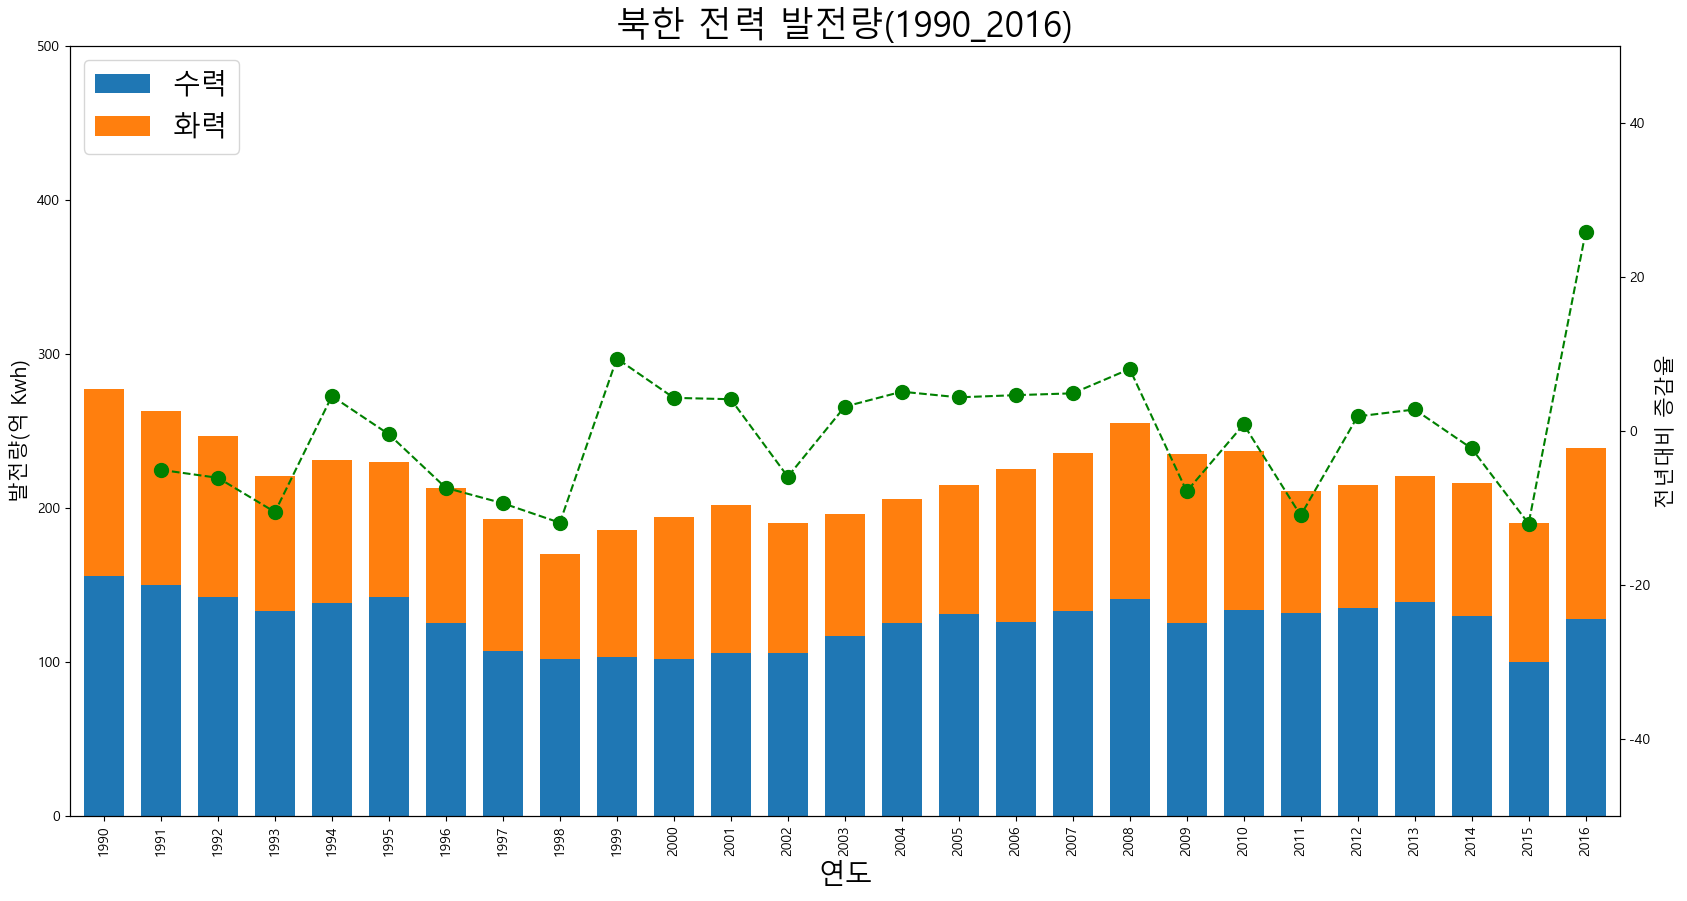

In [10]:
#2축 그래프 그리기 
ax1 =df[['수력','화력']].plot(kind='bar', figsize=(20,10),width=0.7 , stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--',marker='o',markersize=10,color='green', label = '전년대비 증감율(%)')
#ls는 라인스타일
ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)
ax1.set_xlabel('연도',size=20)
ax1.set_ylabel('발전량(억 Kwh)',size=15)
ax2.set_ylabel('전년대비 증감율',size=15)
plt.title('북한 전력 발전량(1990_2016)',size=25)
ax1.legend(loc='upper left',fontsize=20)
plt.show()

In [11]:
#histogram - 단변수 데이터의 빈도수를 나타냄 
df = pd.read_csv('./auto-mpg.csv',header= None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration', 
             'model year','origin','name']

In [12]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320


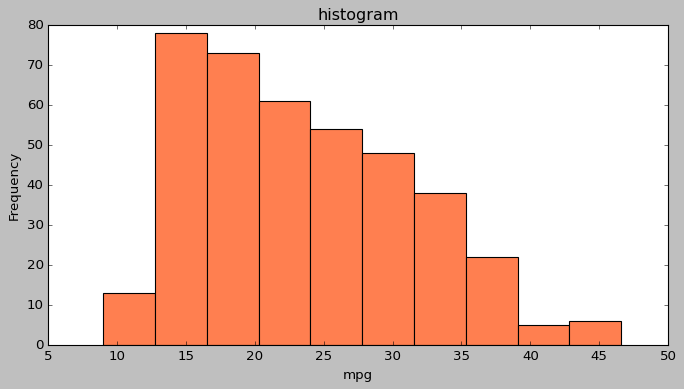

In [13]:
plt.style.use('classic')
#연비(mpg)열에 대한 히스토그램을 그리기 
df['mpg'].plot(kind='hist',bins=10, color= 'coral',figsize=(10,5)) 
    #bins는 mpg10~50 정도의 값을 10구간으로 나눈다. 
plt.title('histogram')
plt.xlabel('mpg')
plt.show()

In [14]:
#df.plot(x='weight',y='mpg',kind='scatter', c='coral', s=10,figsize=())



In [15]:
#버블차트 
#plt.style.use('bmh')
#버블차트를 그리기 위해 cylinder 개수의 상대적 비율을 계산하여 시리즈 생성
#cylinder_size = df.cylinders / df.cylinders.max()
#plt.style.available: 스타일 확인코드 
#df.plot(x='weight',y='mpg',kind='scatter', c='coral', s=cylinder_size ,figsize=(10.5) ,alpha=0.5)
#plt.title('scatter plot: mpg VS. weight')
#plt.show()

In [18]:
#pie 차트 (갯수를 구체적으로 그릴때 많이 사용 )
df['count'] = 1
df_origin = df.groupby('origin').sum()
print(df_origin)

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11516\771272095.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_origin = df.groupby('origin').sum()


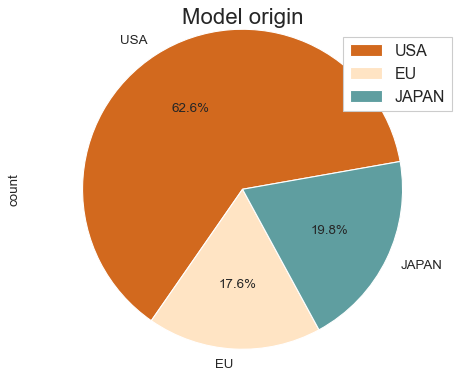

In [56]:
df_origin.index = ['USA','EU','JAPAN']
df_origin['count'].plot(kind='pie', figsize=(7,5), autopct= '%1.1f%%',startangle=10,colors=['chocolate','bisque','cadetblue'])
plt.title('Model origin',size=20) #startangle 은 파이 조각을 나누는 시작점 (각도표시) # 3개의 색상 리스트 
plt.axis('equal') # 파이차트의 비율을 같게 (원에 가깝게 교정)
plt.legend(labels=df_origin.index, loc='upper right')
plt.show()


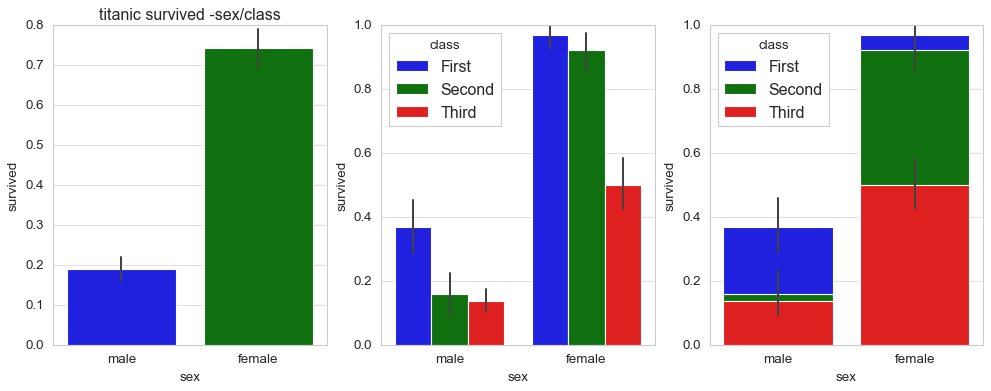

In [60]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
#X축과Y축에 변수를 할당 
sns.barplot(x='sex',y='survived',data=titanic,ax=ax1)
#X축과 Y축에 변수를 할당 HUE옵션 CLASS 
sns.barplot(x='sex',y='survived',hue='class',data=titanic,ax=ax2)
#X축과 Y축에 변수를 할당 HUE옵션 CLASS 누적으로 표시
sns.barplot(x='sex',y='survived',hue='class',dodge=False,data=titanic,ax=ax3)
ax1.set_title('titanic survived -sex')
ax1.set_title('titanic survived -sex/class')
plt.show()
#

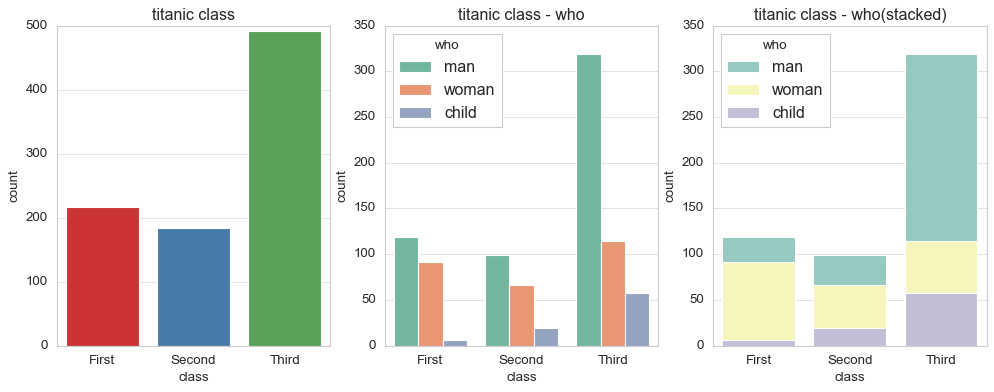

In [71]:
# count plot 
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
#기본값 
sns.countplot(x='class',palette='Set1',data=titanic,ax=ax1)
#hue 옵션으로 who를 추가 (여자, 남자 ,아이) ###@@@@@@@@@@@@@@@
sns.countplot(x='class',palette='Set2',hue='who',data=titanic,ax=ax2)
#hue 옵션으로 who를 추가 (여자, 남자 ,아이)
sns.countplot(x='class',palette='Set3',hue='who',dodge=False,data=titanic,ax=ax3)
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')
plt.show()

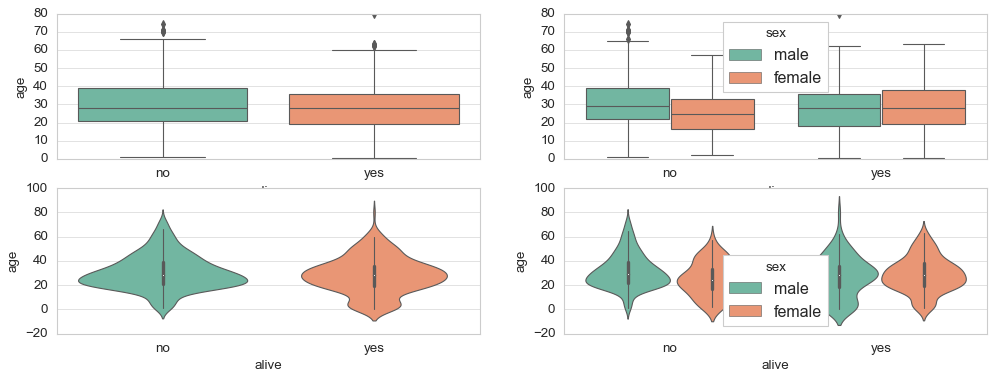

In [81]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
#ax1에 boxplot의 기본값
sns.boxplot(x='alive',y='age',data=titanic,ax=ax1,palette='Set2')
#ax2에 boxplot의 hue
sns.boxplot(x='alive',y='age',hue='sex',data=titanic,ax=ax2,palette='Set2')
#ax3 바이올린그래프 기본값
sns.violinplot(x='alive',y='age',data=titanic,ax=ax3,palette='Set2')
#ax3 바이올린그래프 기본값
sns.violinplot(x='alive',y='age',hue='sex',data=titanic,ax=ax4,palette='Set2')

plt.show()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_1944\3120293780.py:10: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='fare',y='age',data=titanic,ax=ax1)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_1944\3120293780.py:12: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='fare',y='age',kind ='reg',data=titanic,ax=ax2)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_1944\3120293780.py:14: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='fare',y='age',kind ='hex',data=titanic,ax=ax3)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_1944\3120293780.py:16: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='fare',y='age',kind ='kde',data=titanic,ax=ax4)


AttributeError: 'Axes' object has no attribute 'suptitle'

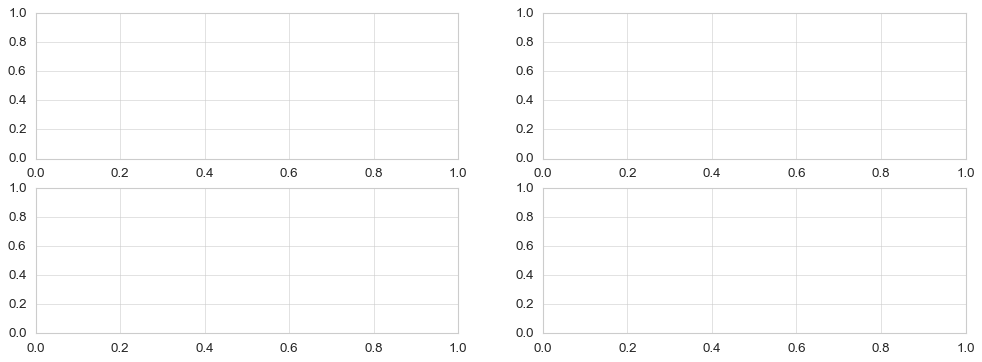

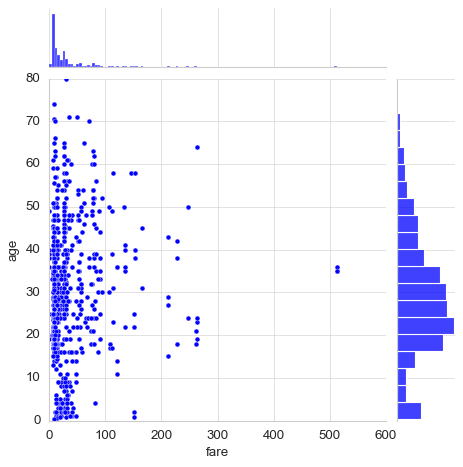

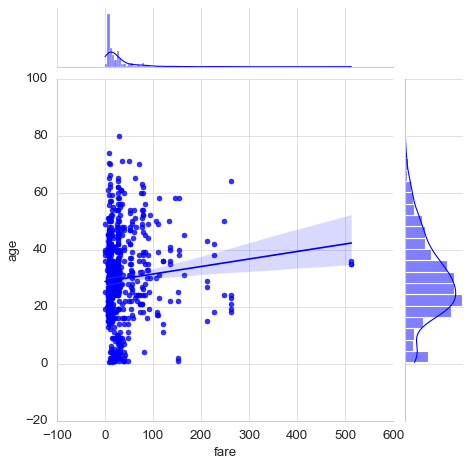

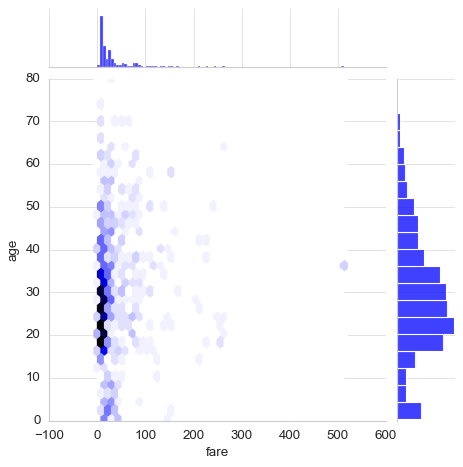

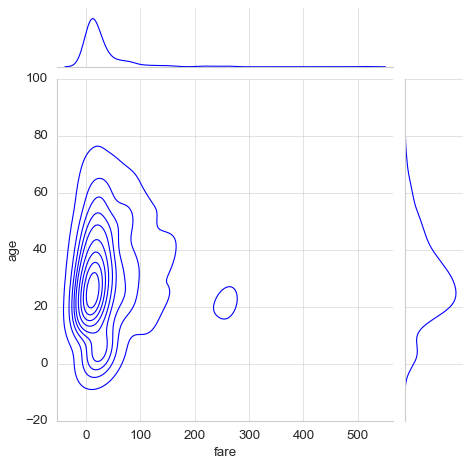

In [93]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
#joint plot : 산점도 + 히스토그램 
sns.set_style('whitegrid')
#조인트 그래프 기본값
sns.jointplot(x='fare',y='age',data=titanic,ax=ax1)
#조인트 그래프 - 회귀선
sns.jointplot(x='fare',y='age',kind ='reg',data=titanic,ax=ax2)
#조인트 그래프 - 육각그래프
sns.jointplot(x='fare',y='age',kind ='hex',data=titanic,ax=ax3)
#조인트 그래프 - 커널 밀집그래프
sns.jointplot(x='fare',y='age',kind ='kde',data=titanic,ax=ax4)
ax1.fig.suptitle('titanic fare -scatter',size=10)
ax2.fig.suptitle('titanic fare -reg',size=10)
ax3.fig.suptitle('titanic fare -hex',size=10)
ax4.fig.suptitle('titanic fare -kde',size=10)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

c:\python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  func(*args, **kwargs)
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


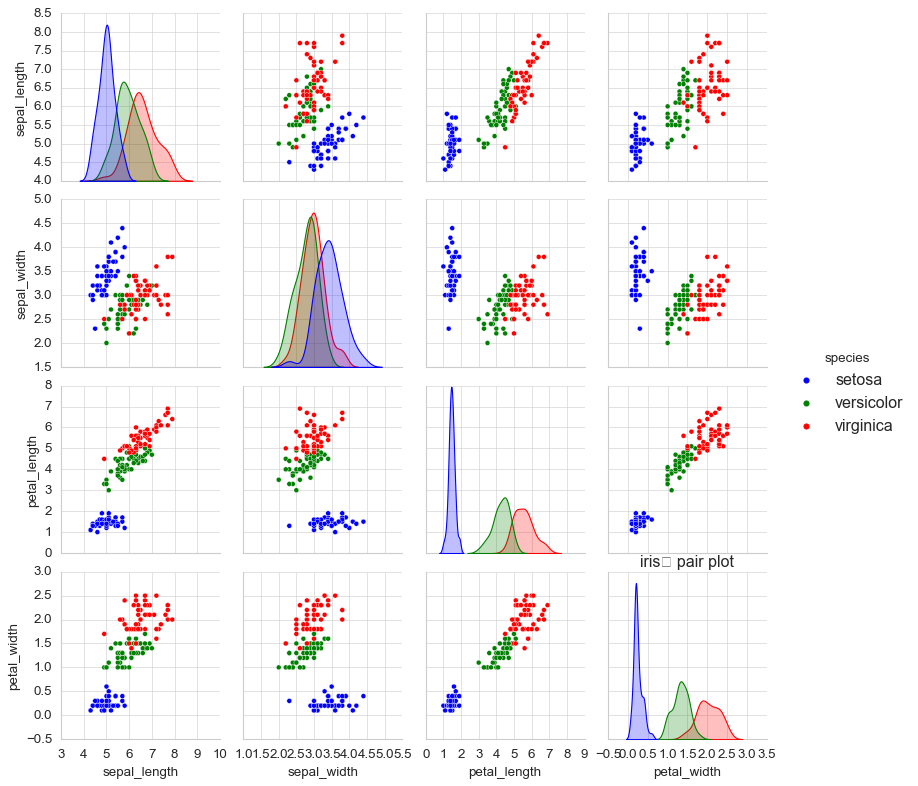

In [91]:
iris = sns.load_dataset('iris')
sns.pairplot(iris,hue='species')
plt.title('iris의 pair plot')
plt.show